# **MA1042 Matemáticas y Ciencia de Datos para la toma de decisiones**
# **Tutorial 8: Regresión lineal en Python**
# *Prof. Elizabeth Martínez Gómez*




# **Regresión lineal**

En esta ocasión trabajaremos de nuevo en Google Colab porque el análisis estadístico del modelo de regresión tiene una parte gráfica que es más fácil de realizar a través del módulo *seaborn*.

Por una razón, que aún no comprendo, *Pycharm* no muestra las gráficas realizadas bajo *seaborn*. 

El módulo *scikit-learn* muestra gráficas de residuos pero no se parecen a las mostradas por R ni por Minitab. Además este módulo está más pensado para crear modelos predictivos y no explicativos como lo es el nuestro.

In [3]:
import numpy as np
import pandas as pd

from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.formula.api as smf       # permite ajustar modelos estadísticos utilizando fórmulas al estilo de R
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt

Se desea proponer un modelo lineal que permita predecir el peso de un libro en funcion de su volumen y del tipo de tapas (duras o blandas).

    peso  volumen tipo_tapas
0    800      885      duras
1    950     1016      duras
2   1050     1125      duras
3    350      239      duras
4    750      701      duras
5    600      641      duras
6   1075     1228      duras
7    250      412    blandas
8    700      953    blandas
9    650      929    blandas
10   975     1492    blandas
11   350      419    blandas
12   950     1010    blandas
13   425      595    blandas
14   725     1034    blandas


,peso,volumen
peso,1.000000,0.895899
volumen,0.895899,1.000000


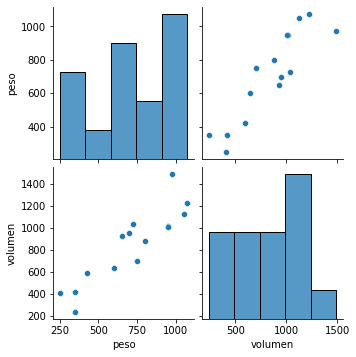

In [4]:
libros = {"peso":[800, 950, 1050, 350, 750, 600, 1075, 250, 700,
                              650, 975, 350, 950, 425, 725],
                     "volumen":[885, 1016, 1125, 239, 701, 641, 1228, 412, 953,
                                 929, 1492, 419, 1010, 595, 1034],
                     "tipo_tapas":["duras", "duras", "duras", "duras", "duras", 
                                    "duras", "duras", "blandas", "blandas",
                                    "blandas", "blandas", "blandas", "blandas",
                                    "blandas", "blandas"]}

df = pd.DataFrame(libros)
print(df)                                   

# matriz de graficas de dispersion

sns.pairplot(df)

df.corr("pearson")


## **Primer modelo de regresión**

# Estimación de los parámetros $\beta$ del modelo:


In [5]:
modelo1 = ols("peso ~ volumen + tipo_tapas", data=df).fit()

Los resultados del modelo son:

In [6]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     76.73
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           1.45e-07
Time:                        03:34:54   Log-Likelihood:                -84.999
No. Observations:                  15   AIC:                             176.0
Df Residuals:                      12   BIC:                             178.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.9156    

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Gráfica del modelo lineal

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


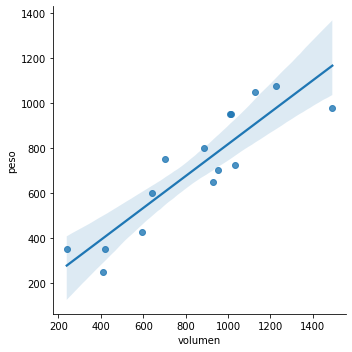

In [ ]:
sns.lmplot("volumen", "peso",data=df, ci=95) # esta grafica solo tiene sentido cuando hay dos variables

La gráfica anterior muestra las observaciones originales con el primer modelo lineal propuesto. Además se muestra la banda de confianza del 95% para este modelo.

# Diagnóstico del modelo

En un análisis de regresión, las observaciones individuales (por ejemplo, los *outliers*) pueden tener una fuerte influencia sobre los resultados del modelo.


# 1. Linealidad del modelo

Text(0, 0.5, 'Residuos')

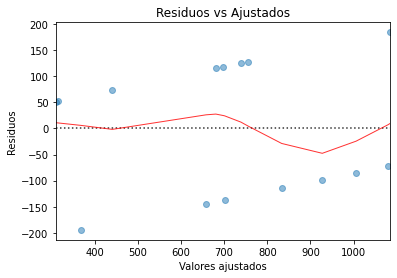

In [ ]:
model_fitted_y = modelo1.fittedvalues

plot = sns.residplot(x=model_fitted_y, y='volumen', data=df, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot.set_title('Residuos vs Ajustados')
plot.set_xlabel('Valores ajustados')
plot.set_ylabel('Residuos')


# 2. Normalidad de los residuos

[('Jarque-Bera', 11.515514677955693),
 ('Chi^2 two-tail prob.', 0.0031581864038326257),
 ('Skew', 1.518258533877866),
 ('Kurtosis', 6.0338733628741394)]

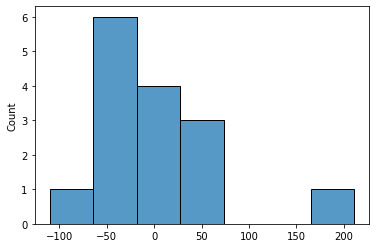

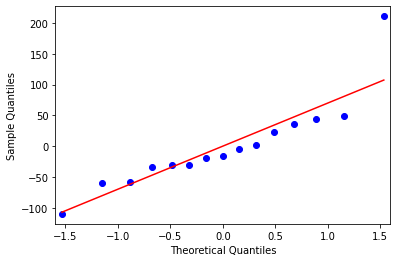

In [ ]:
# Extraemos los residuos del modelo
resid= modelo1.resid
#print(resid)

# Hacemos un histograma para ver su distribucion

sns.histplot(resid)

# QQ-plot
sm.qqplot(resid, line='s')

# Prueba de hipotesis para normalidad de los residuos
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(modelo1.resid)
lzip(name, test)

## 3. Detección de observaciones influyentes en la regresión

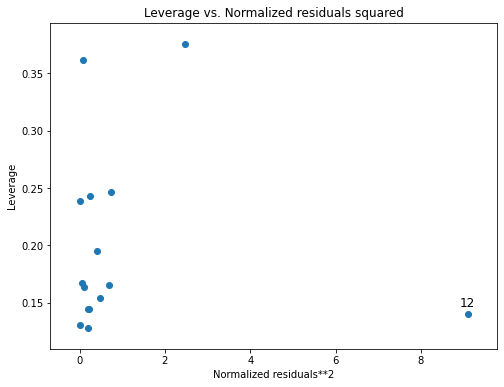

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

test_class = OLSInfluence(modelo1)
test_class.dfbetas[:5, :]
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(modelo1, ax=ax)

Una gráfica muy útil para detectar observaciones influyentes o outliers para la regresión:

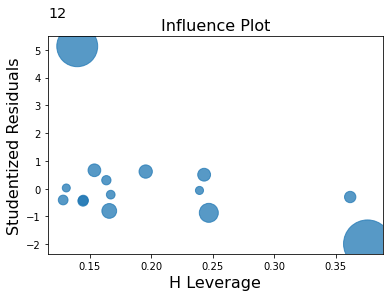

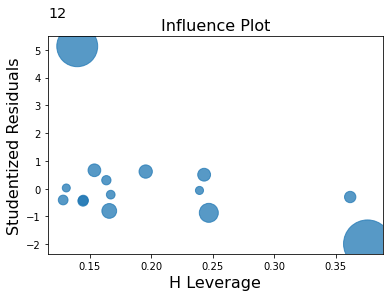

In [ ]:
sm.graphics.influence_plot(modelo1, criterion="cooks")

Para identificar los valores que tienen una fuerte influencia, en la gráfica anterior buscamos:


1.   Grandes puntos azules (distancia de Cook grande) y 
2.   alto apalancamiento (leverage) quienes adicionalmente tendrán
3.   residuos muy grandes o muy bajos

## 4. Homoscedasticidad (Prueba de Breusch-Pagan)

In [ ]:
# Notese que trabajamos sobre los residuos NO sobre las observaciones

names = ['Lagrange multiplier statistic', 'p-value']
test = sms.het_breuschpagan(modelo1.resid, modelo1.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 2.0962393020402725),
 ('p-value', 0.350596373228247)]

Como el valor-p es mayor que mi riesgo $\alpha=0.05$ entonces No rechazo hipótesis nula y por consiguiente los residuos tienen varianza constante.

## 5. Independencia de los residuos (Prueba Durbin-Watson)

En la tabla de resultados se nos proporciona el valor del estadístico Durbin-Watson. En este caso es 1.971 pero Python (otra vez dando dolores de cabeza) no nos da el *p-value*. Entonces buscamos una tabla de esta estadístico.

Lo más fácil es usar Google y buscar "prueba Durbin Watson Minitab". Esa tabla está sencilla de leer y usar.

De acuerdo con la explicación que allí mismo se da, se concluye que NO hay autocorrelación de los residuos. En otras palabras, significa que los residuos son **independientes**.

## 6. Eliminación del dato influyente

Aún cuando el modelo parece ser adecuado porque:

1. Cumple con la significancia individual (todos los coeficientes deben ir en el modelo excepto por el intercepto). Para esto usamos el pvalue de la tabla de resultados.
2. Cumple con la significancia conjunta, esto es, al menos un coeficiente es distinto de cero. Esto lo vimos con el pvalue del estadistico F de la tabla de resultados.
3. La linealidad del modelo es aceptable (el valor de $R^2$ es alto) y la gráfica de residuos vs valores ajustados muestra una línea roja más o menos horizontal, además de que los residuos no muestran un patrón específico.
4. La normalidad de los residuos es aceptable.
5. La varianza de los residuos es constante (usamos la prueba de Breusch-Pagan).
6. Existe la evidencia de que la observación 13 del conjunto de datos debería eliminarse del análisis porque tal vez influya de manera importante en el modelo.

Así que estimaremos un segundo modelo sin esta observación.

In [7]:
df2= df.drop(12) # borramos el renglón 13 (recuerda que Python cuenta desde cero)
print(df2)

modelo2 = ols("peso ~ volumen + tipo_tapas", data=df2).fit()
print(modelo2.summary())

    peso  volumen tipo_tapas
0    800      885      duras
1    950     1016      duras
2   1050     1125      duras
3    350      239      duras
4    750      701      duras
5    600      641      duras
6   1075     1228      duras
7    250      412    blandas
8    700      953    blandas
9    650      929    blandas
10   975     1492    blandas
11   350      419    blandas
13   425      595    blandas
14   725     1034    blandas
                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     235.4
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           9.37e-10
Time:                        03:35:12   Log-Likelihood:                -71.271
No. Observations:                  14   AIC:                             148.5
Df Residuals

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Vemos que este modelo es mejor que el primero. Su $R^2$ es más alta, los errores bajan. Repite los pasos anteriores para validar estadísticamente el modelo.

## Modelo 3:

Consideramos el modelo sin dato influyente y además (de manera muy arbitraria), decidimos elevar al cuadrado la variable Volumen.

In [28]:
vol2=df.volumen**2

df2['volumen2'] = vol2  # agregamos esta nueva variable
print(df2)

0      783225
1     1032256
2     1265625
3       57121
4      491401
5      410881
6     1507984
7      169744
8      908209
9      863041
10    2226064
11     175561
12    1020100
13     354025
14    1069156
Name: volumen, dtype: int64
    peso  volumen tipo_tapas  Volumen2  volumen2
0    800      885      duras    783225    783225
1    950     1016      duras   1032256   1032256
2   1050     1125      duras   1265625   1265625
3    350      239      duras     57121     57121
4    750      701      duras    491401    491401
5    600      641      duras    410881    410881
6   1075     1228      duras   1507984   1507984
7    250      412    blandas    169744    169744
8    700      953    blandas    908209    908209
9    650      929    blandas    863041    863041
10   975     1492    blandas   2226064   2226064
11   350      419    blandas    175561    175561
13   425      595    blandas    354025    354025
14   725     1034    blandas   1069156   1069156


In [29]:
modelo3 = ols("peso ~ volumen2 + tipo_tapas",data=df2).fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     56.47
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           1.64e-06
Time:                        03:47:45   Log-Likelihood:                -80.776
No. Observations:                  14   AIC:                             167.6
Df Residuals:                      11   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             262.5932    

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Vemos que empeoró este modelo.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


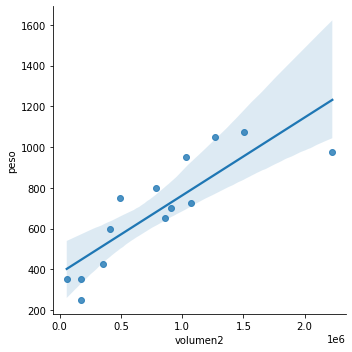

In [30]:
sns.lmplot("volumen2", "peso",data=df2, ci=95) # esta grafica solo tiene sentido cuando hay dos variables

In [39]:
volumen_futuro = np.array([1600,1700,1800])
tipotapas_futuro = np.array([0,1,0]) # 0=blandas, 1=duras
nuevos_pesos = 3.3263+0.6945*volumen_futuro+214.1865*tipotapas_futuro

print(nuevos_pesos)

[1114.5263 1398.1628 1253.4263]
